# Convolutional Neural Network

## Getting the data

In [1]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"naruto shippuden anime,naruto anime, sasuke anime, sasuke transparent,naruto transparent","limit":100,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


Item no.: 1 --> Item name = naruto shippuden anime
Evaluating...
Starting Download...
Image URL: https://img1.ak.crunchyroll.com/i/spire4/1c1df98707aa0f22aa54342af725e48a1491245343_full.jpg
Completed Image ====> 1.1c1df98707aa0f22aa54342af725e48a1491245343_full.jpg
Image URL: https://upload.wikimedia.org/wikipedia/en/thumb/a/ad/Naruto_-_Shippuden_DVD_season_1_volume_1.jpg/220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg
Completed Image ====> 2.220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg
Image URL: https://m.media-amazon.com/images/M/MV5BYWFkM2M0M2ItZWY3Yy00NmIzLWFhOGYtODU0N2FhZmNlNmRlXkEyXkFqcGdeQXVyMzExMzk5MTQ@._V1_UY268_CR4,0,182,268_AL_.jpg
Completed Image ====> 3.MV5BYWFkM2M0M2ItZWY3Yy00NmIzLWFhOGYtODU0N2FhZmNlNmRlXkEyXkFqcGdeQXVyMzExMzk5MTQ@._V1_UY268_CR4,0,182,268_AL_.jpg
Image URL: https://i.ytimg.com/vi/fKV8FG5R1-k/maxresdefault.jpg
Completed Image ====> 4.maxresdefault.jpg
Image URL: https://i.pinimg.com/originals/1f/68/41/1f6841f09098c757a3325e33e30b45ae.jpg
Complet

Completed Image ====> 42.P5219-FR3.jpg
Image URL: https://i.pinimg.com/originals/a0/47/2a/a0472a69e6aa142b0e53119373f60003.jpg
Completed Image ====> 43.a0472a69e6aa142b0e53119373f60003.jpg
Image URL: https://store-images.s-microsoft.com/image/apps.63539.14006321192379138.b8e71bae-481d-434c-9a03-158a17e1e3e1.4f138845-0fdb-4b1c-b099-35a59b1b04b4?mode=scale&q=90&h=270&w=270&background=%230078D7
Invalid or missing image format. Skipping...
Image URL: https://www.anime-planet.com/images/anime/covers/thumbs/naruto-shippuden-movie-5-blood-prison-4191.jpg?t=1447398863
Completed Image ====> 44.naruto-shippuden-movie-5-blood-prison-4191.jpg
Image URL: https://i0.wp.com/thedailyfandom.com/wp-content/uploads/2015/01/21-e1421337829538.jpg?fit=600%2C386&ssl=1
Completed Image ====> 45.21-e1421337829538.jpg
Image URL: https://cdn.shopify.com/s/files/1/0747/3829/products/mz1348_1024x1024.jpeg?v=1485015016
Completed Image ====> 46.mz1348_1024x1024.jpeg
Image URL: https://images-wixmp-ed30a86b8c4ca887773

Completed Image ====> 78.hitaiate-naruto-naruto-shippuden-anime-manga-game-live-actio.jpg
Image URL: https://www.pngfind.com/pngs/m/335-3353435_naruto-shippuden-sakura-anime-hd-png-download.png
Completed Image ====> 79.335-3353435_naruto-shippuden-sakura-anime-hd-png-download.png
Image URL: https://img1.ak.crunchyroll.com/i/spire4-tmb/cb711fcb8e63d3921a485809507f23bf1476124489_full.jpg
Completed Image ====> 80.cb711fcb8e63d3921a485809507f23bf1476124489_full.jpg
Image URL: https://steamcdn-a.akamaihd.net/steam/apps/543870/header.jpg?t=1506550664
Completed Image ====> 81.header.jpg
Image URL: http://www.animationscoop.com/wp-content/uploads/2017/11/naruto460.jpg
Completed Image ====> 82.naruto460.jpg
Image URL: https://qph.fs.quoracdn.net/main-qimg-d0333194a3e4d47f666c37a5b259e75d
Invalid or missing image format. Skipping...
Image URL: https://cdn.shopify.com/s/files/1/0747/3829/products/mZ0307_1024x1024.jpeg?v=1485014356
Completed Image ====> 83.mZ0307_1024x1024.jpeg
Image URL: https://

Completed Image ====> 35.tv_061.jpg
Image URL: https://usercontent1.hubstatic.com/12949254_f520.jpg
Completed Image ====> 36.12949254_f520.jpg
Image URL: http://cdn.shopify.com/s/files/1/0019/7207/6657/products/il_fullxfull.1451433587_b1by_b12ef02f-d956-42f0-8125-ae6d7daf8ae0_1200x1200.jpg?v=1533261245
Completed Image ====> 37.il_fullxfull.1451433587_b1by_b12ef02f-d956-42f0-8125-ae6d7daf8ae0_1200x1200.jpg
Image URL: https://i.kinja-img.com/gawker-media/image/upload/s--iVHBOWqJ--/c_scale,f_auto,fl_progressive,q_80,w_800/ubplmsahpvs2r1cnknhl.png
Completed Image ====> 38.ubplmsahpvs2r1cnknhl.png
Image URL: https://upload.wikimedia.org/wikipedia/en/thumb/a/ad/Naruto_-_Shippuden_DVD_season_1_volume_1.jpg/220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg
Completed Image ====> 39.220px-Naruto_-_Shippuden_DVD_season_1_volume_1.jpg
Image URL: https://static1.squarespace.com/static/557a0fd3e4b064e7f04db74f/t/56c4ece75f21e009ed3ad356/1455747502927/Naruto-Pain.jpg
Completed Image ====> 40.Naruto-

Completed Image ====> 76.https%3A%2F%2Fhypebeast.com%2Fimage%2F2019%2F04%2Fnaruto-ramen-ichiraku-official-0.jpg
Image URL: https://pics.me.me/ill-save-you-cr-naruto-time-just-fanart-24813749.png
Completed Image ====> 77.ill-save-you-cr-naruto-time-just-fanart-24813749.png
Image URL: https://static.posters.cz/image/750/plakatok/naruto-shippuden-group-i32849.jpg
Completed Image ====> 78.naruto-shippuden-group-i32849.jpg
Image URL: https://www.animeforhumanity.org/wp-content/uploads/2019/04/Naruto-Article-afh.png
Completed Image ====> 79.Naruto-Article-afh.png
Image URL: https://store-images.s-microsoft.com/image/apps.17218.64477055799772119.7f616c5d-1c64-4b76-87ed-8cabaf8911d1.ea2bdb58-4948-4c67-a917-04ded702c1bf?mode=scale&q=90&h=1080&w=1920
Invalid or missing image format. Skipping...
Image URL: https://cdn.shopify.com/s/files/1/1227/8928/products/Naruto_Poster_1_1024x1024.jpg?v=1469809167
Completed Image ====> 80.Naruto_Poster_1_1024x1024.jpg
Image URL: http://clipartmag.com/images/na

Completed Image ====> 33.14.jpg
Image URL: https://images-na.ssl-images-amazon.com/images/I/41SORCAUA%2BL.jpg
Completed Image ====> 34.41SORCAUA%2BL.jpg
Image URL: https://www.tokkoro.com/picsup/5082048-anime-black-hair-boy-rinnegan-naruto-sasuke-uchiha-sharingan-naruto.png
Completed Image ====> 35.5082048-anime-black-hair-boy-rinnegan-naruto-sasuke-uchiha-sharingan-naruto.png
Image URL: https://cdn.shopify.com/s/files/1/0183/2727/products/PNG-LA-Survive-Figure-NarutoSasuke-12.png?v=1553205352
Completed Image ====> 36.PNG-LA-Survive-Figure-NarutoSasuke-12.png
Image URL: https://ae01.alicdn.com/kf/HTB1HGyrRFXXXXcMXFXXq6xXFXXXG/NARUTO-anime-cosplay-Uchiha-Sasuke-costume-halloween-kids-costumes.jpg
Completed Image ====> 37.NARUTO-anime-cosplay-Uchiha-Sasuke-costume-halloween-kids-costumes.jpg
Image URL: https://www.ubackground.com/_ph/4/923646314.jpg
Completed Image ====> 38.923646314.jpg
Image URL: https://img3.goodfon.com/wallpaper/nbig/2/46/anime-naruto-naruto-sasuke.jpg
Completed Imag

Completed Image ====> 77.5094060-anime-black-hair-man-ninja-rinnegan-naruto-sasuke-uchiha-sharingan-naruto-sword.jpg
Image URL: https://mondrian.mashable.com/2019%252F01%252F16%252Fe7%252Fce7c75989f0a463ab41a0e36a4d5edf1.7099b.png%252F1200x630.png?signature=q70url7vuW_ovr2kw9Jw5T5q9Ek=
Completed Image ====> 78.2019%252F01%252F16%252Fe7%252Fce7c75989f0a463ab41a0e36a4d5edf1.7099b.png
Image URL: https://hdwallpaperim.com/wp-content/uploads/2017/08/22/85357-Naruto_Shippuuden-anime-Sharingan-anime_vectors-Uchiha_Sasuke-748x561.jpg
Completed Image ====> 79.85357-Naruto_Shippuuden-anime-Sharingan-anime_vectors-Uchiha_Sasuke-748x561.jpg
Image URL: https://cdn130.picsart.com/242074577022202.jpg?r1024x1024
Completed Image ====> 80.242074577022202.jpg
Image URL: https://qph.fs.quoracdn.net/main-qimg-030f7b779f88c7f9dc71c3f1aa244bbb
Invalid or missing image format. Skipping...
Image URL: https://i.ytimg.com/vi/z6OWL7SSLHY/maxresdefault.jpg
Completed Image ====> 81.maxresdefault.jpg
Image URL: http

Completed Image ====> 28.321-3218257_sasuke-uchiha-png-transparent.png
Image URL: https://library.kissclipart.com/20190219/yqe/kissclipart-sasuke-transparent-clipart-sasuke-uchiha-itachi-uc-da484ffc62b45c91.png
Completed Image ====> 29.kissclipart-sasuke-transparent-clipart-sasuke-uchiha-itachi-uc-da484ffc62b45c91.png
Image URL: https://www.pngfind.com/pngs/m/81-818977_sasuke-rinnegan-png-sasuke-uchiha-transparent-png.png
Completed Image ====> 30.81-818977_sasuke-rinnegan-png-sasuke-uchiha-transparent-png.png
Image URL: https://www.pngfind.com/pngs/m/12-128338_sasuke-png-hd-sasuke-uchiha-transparent-png.png
Completed Image ====> 31.12-128338_sasuke-png-hd-sasuke-uchiha-transparent-png.png
Image URL: https://www.pngkey.com/png/detail/5-56665_uchiha-sasuke-png-photo-sasuke-uchiha-the-last.png
Completed Image ====> 32.5-56665_uchiha-sasuke-png-photo-sasuke-uchiha-the-last.png
Image URL: https://www.pngfind.com/pngs/m/234-2349799_sasuke-boruto-png-transparent-png.png
Completed Image ====> 

Completed Image ====> 64.sasuke-face-png-3.png
Image URL: https://www.nicepng.com/png/detail/50-500435_sasuke-and-hebi-by-ar-sasuke-uchiha-con.png
Completed Image ====> 65.50-500435_sasuke-and-hebi-by-ar-sasuke-uchiha-con.png
Image URL: https://www.pngkey.com/png/detail/50-500118_naruto-sasuke-and-vs-image-naruto-and-sasuke.png
Completed Image ====> 66.50-500118_naruto-sasuke-and-vs-image-naruto-and-sasuke.png
Image URL: https://media.giphy.com/media/tsoUc6UCevZkc/giphy.gif
Completed Image ====> 67.giphy.gif
Image URL: https://www.sccpre.cat/mypng/full/13-133557_sasuke-png.png
Completed Image ====> 68.13-133557_sasuke-png.png
Image URL: https://png2.kisspng.com/20180205/rrw/kisspng-kakashi-hatake-sasuke-uchiha-gaara-naruto-uzumaki-kakashi-png-transparent-image-5a78ce7b81ddb1.0271037315178666195319.png
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Image URL: https://toppng.com/public/uploads/preview/sasuke-uchiha-chibi-11550214300rzhc7rirtj.png
Completed Ima

Completed Image ====> 7.5852cd7658215f0354495f6a.png
Image URL: http://www.stickpng.com/assets/images/5852cd6658215f0354495f68.png
Completed Image ====> 8.5852cd6658215f0354495f68.png
Image URL: https://www.nicepng.com/png/detail/6-62007_part-i-naruto-kid-naruto-transparent.png
Completed Image ====> 9.6-62007_part-i-naruto-kid-naruto-transparent.png
Image URL: https://ui-ex.com/images/naruto-transparent-happy-2.png
Completed Image ====> 10.naruto-transparent-happy-2.png
Image URL: https://dianasalsa.de/assets/images/anime/81/uzumaki_naruto_4.png
Completed Image ====> 11.uzumaki_naruto_4.png
Image URL: https://png2.kisspng.com/20180831/hag/kisspng-naruto-uzumaki-sakura-haruno-sasuke-uchiha-ninja-naruto-elements-5b8996873aa1e8.5273969415357436232402.png
URLError on an image...trying next one... Error: HTTP Error 403: Forbidden
Image URL: http://www.pngnames.com/files/3/Naruto-Transparent-Background.png
Completed Image ====> 12.Naruto-Transparent-Background.png
Image URL: http://pngriver.

Completed Image ====> 59.237-2379531_naruto-naruto-kid.png
Image URL: http://pngriver.com/wp-content/uploads/2018/03/Download-Naruto-Shippuden-Transparent-Background-For-Designing-Use-1000x2376.png
Completed Image ====> 60.Download-Naruto-Shippuden-Transparent-Background-For-Designing-Use-1000x2376.png
Image URL: https://www.pngkit.com/png/detail/2-25134_naruto-transparent-sad-sad-naruto-png.png
Completed Image ====> 61.2-25134_naruto-transparent-sad-sad-naruto-png.png
Image URL: https://i.pinimg.com/originals/9f/31/4d/9f314d412719f4b074f9fd8c1ce54bf0.jpg
Completed Image ====> 62.9f314d412719f4b074f9fd8c1ce54bf0.jpg
Image URL: https://dianasalsa.de/assets/images/anime/81/hatake_kakashi_2.png
Completed Image ====> 63.hatake_kakashi_2.png
Image URL: http://38.media.tumblr.com/83848692f0a2863169695c0476032baa/tumblr_nd98jk2iQG1qj313eo1_500.png
Completed Image ====> 64.tumblr_nd98jk2iQG1qj313eo1_500.png
Image URL: https://www.pngkey.com/png/detail/10-103621_naruto-uzumaki-and-kushina-image

In [2]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('downloads', output="dataset", seed=1337, ratio=(.8, .2)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# split_folders.fixed('downloads', output="dataset", seed=1337, fixed=(100, 100), oversample=False) # default values

## Building baseline model

### Building the CNN

In [173]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import matplotlib.pyplot as plt

In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

Instructions for updating:
Colocations handled automatically by placer.


"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [4]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

'reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'

In [5]:
# Step 3 - Flattening
classifier.add(Flatten())

In [6]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))

'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=1, activation='sigmoid'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [8]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images

####  Image Preprocessing

In [9]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 647 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


#### Checkpoint

In [10]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [11]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=647,
                         epochs=5,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=160)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Instructions for updating:
Use tf.cast instead.
Epoch 1/5


/usr/local/lib/python3.5/dist-packages/PIL/Image.py:966: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


647/647 [==============================] - 751s 1s/step - loss: 0.2244 - acc: 0.9115 - val_loss: 0.7170 - val_acc: 0.8063

Epoch 00001: val_acc improved from -inf to 0.80625, saving model to weights.best.hdf5
Epoch 2/5
647/647 [==============================] - 745s 1s/step - loss: 0.0432 - acc: 0.9865 - val_loss: 0.9078 - val_acc: 0.8375

Epoch 00002: val_acc improved from 0.80625 to 0.83750, saving model to weights.best.hdf5
Epoch 3/5
647/647 [==============================] - 735s 1s/step - loss: 0.0170 - acc: 0.9950 - val_loss: 1.2376 - val_acc: 0.7937

Epoch 00003: val_acc did not improve from 0.83750
Epoch 4/5
647/647 [==============================] - 746s 1s/step - loss: 0.0179 - acc: 0.9944 - val_loss: 1.3792 - val_acc: 0.7937

Epoch 00004: val_acc did not improve from 0.83750
Epoch 5/5
647/647 [==============================] - 739s 1s/step - loss: 0.0095 - acc: 0.9971 - val_loss: 1.4143 - val_acc: 0.7937

Epoch 00005: val_acc did not improve from 0.83750


'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

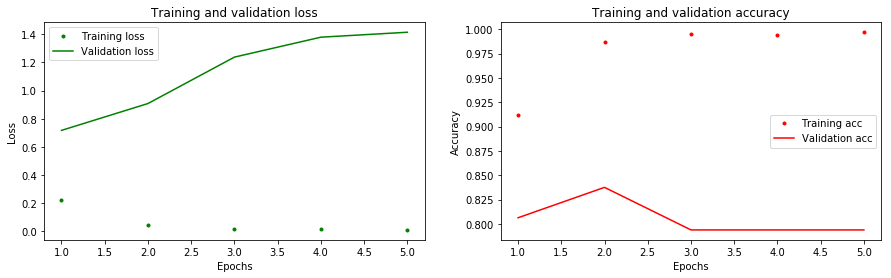

In [12]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
classifier.save('model1.h5')

In [14]:
from keras.models import load_model
model1 = load_model('Models/model1.h5')
model1.load_weights('Models/model1_weights.best.hdf5')

In [15]:
model1.evaluate_generator(generator=test_set,
steps=160)

[0.9080773990601301, 0.8376953125]

## Binary Model with Added Convolution Layers and Dropout

### Building the CNN

In [72]:
# Initialising the CNN
classifier = Sequential()

In [73]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [74]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

In [75]:
# Step 3 - Flattening
classifier.add(Flatten())

In [76]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=1, activation='sigmoid'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [77]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images

####  Image Preprocessing

In [78]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 647 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


#### Checkpoint

In [79]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [80]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=647,
                         epochs=5,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=160)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/5
647/647 [==============================] - 731s 1s/step - loss: 0.3237 - acc: 0.8553 - val_loss: 0.3669 - val_acc: 0.8250

Epoch 00001: val_acc improved from -inf to 0.82500, saving model to weights.best.hdf5
Epoch 2/5
647/647 [==============================] - 720s 1s/step - loss: 0.1159 - acc: 0.9558 - val_loss: 0.4287 - val_acc: 0.8500

Epoch 00002: val_acc improved from 0.82500 to 0.85000, saving model to weights.best.hdf5
Epoch 3/5
647/647 [==============================] - 720s 1s/step - loss: 0.0582 - acc: 0.9802 - val_loss: 0.5397 - val_acc: 0.8750

Epoch 00003: val_acc improved from 0.85000 to 0.87500, saving model to weights.best.hdf5
Epoch 4/5
647/647 [==============================] - 721s 1s/step - loss: 0.0371 - acc: 0.9883 - val_loss: 0.6324 - val_acc: 0.8438

Epoch 00004: val_acc did not improve from 0.87500
Epoch 5/5
647/647 [==============================] - 725s 1s/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.8014 - val_acc: 0.8375

Epoch 00005: val_acc 

'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

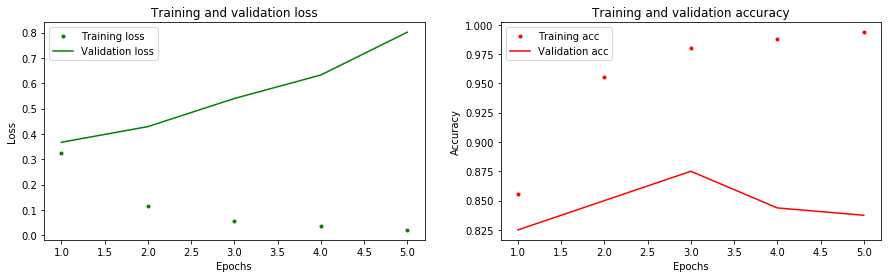

In [81]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [82]:
classifier.save('model2.h5')

In [85]:
from keras.models import load_model
model2 = load_model('Models/model2.h5')
model2.load_weights('Models/model2_weights.best.hdf5')

In [86]:
model2.evaluate_generator(generator=test_set,
steps=160)

[0.5368599732406437, 0.875]

## Creating a Multi-Class Model

### Building the CNN

In [22]:
# Initialising the CNN
classifier = Sequential()

In [23]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.
'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n"

In [24]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

In [25]:
# Step 3 - Flattening
classifier.add(Flatten())

In [26]:
# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=3, activation='softmax'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [27]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''

" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images

#### Image Preprocessing

In [163]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset2/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset2/val',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 919 images belonging to 3 classes.
Found 231 images belonging to 3 classes.


#### Checkpoint

In [29]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#### Fit Generator

In [30]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=919,
                         epochs=10,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=231)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/10
919/919 [==============================] - 1108s 1s/step - loss: 0.6146 - acc: 0.7279 - val_loss: 0.6582 - val_acc: 0.7791

Epoch 00001: val_acc improved from -inf to 0.77914, saving model to weights.best.hdf5
Epoch 2/10
919/919 [==============================] - 1099s 1s/step - loss: 0.2294 - acc: 0.9142 - val_loss: 0.7971 - val_acc: 0.8055

Epoch 00002: val_acc improved from 0.77914 to 0.80546, saving model to weights.best.hdf5
Epoch 3/10
919/919 [==============================] - 1098s 1s/step - loss: 0.1204 - acc: 0.9567 - val_loss: 0.9988 - val_acc: 0.7917

Epoch 00003: val_acc did not improve from 0.80546
Epoch 4/10
919/919 [==============================] - 1102s 1s/step - loss: 0.0878 - acc: 0.9688 - val_loss: 1.1607 - val_acc: 0.7831

Epoch 00004: val_acc did not improve from 0.80546
Epoch 5/10
919/919 [==============================] - 1101s 1s/step - loss: 0.0662 - acc: 0.9763 - val_loss: 1.0953 - val_acc: 0.7824

Epoch 00005: val_acc did not improve from 0.80546


'\n* steps_per epoch should equal the number of images in the training set.\n* can use more than 25 epochs if using a GPU.\n* validation_steps should equal the number of images in the testing set.\n'

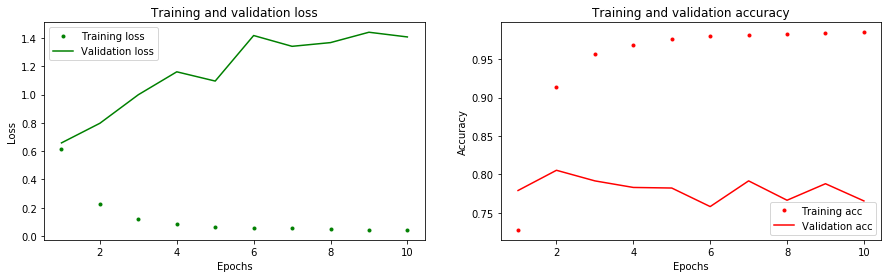

In [31]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
classifier.save('model3.h5')

In [161]:
from keras.models import load_model
model3 = load_model('Models/model3.h5')
model3.load_weights('Models/model3_weights.best.hdf5')

In [164]:
model3.evaluate_generator(generator=test_set,
steps=231)

[0.7975561319317644, 0.8054393308734865]

### Building the CNN

In [90]:
# from keras.applications import inception_v3
# imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
# imagenet_new=imagenet.output


In [174]:
# Initialising the CNN
classifier = Sequential()

In [175]:
# Step 1 - Convolution
classifier.add(Conv2D(128, (3, 3), input_shape=(128, 128, 3), activation='relu'))

'''
* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)
* feature detector consists of 3 rows and 3 columns.

* input_shape= shape of input image (converting all images to fixed size/image format)
* since the images are color images, they will be converted into 3-D arrays.
* 64x64 format (128 or 256 if using a GPU)

* activation function 'relu' is most commonly used for CNN.

'''

"\n* 32 feature detector-->32 feature maps (size of 5x5). (64 if using a GPU)\n* feature detector consists of 3 rows and 3 columns.\n\n* input_shape= shape of input image (converting all images to fixed size/image format)\n* since the images are color images, they will be converted into 3-D arrays.\n* 64x64 format (128 or 256 if using a GPU)\n\n* activation function 'relu' is most commonly used for CNN.\n\n"

In [176]:
# Step 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

'''reduces the size of our feature maps into 2x2 (reducing the complexity of the model).'''

# Adding a second convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Adding a fourth convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

# Adding a fifth convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

In [177]:
# Step 3 - Flattening
classifier.add(Flatten())

In [178]:
# Step 4 - Full connection
classifier.add(Dense(units=256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
classifier.add(Dropout(0.5))
'''
* units= number of nodes in the hidden layer(full connection).

* 128 is not too small, but it can be higher if using GPU.

* activation function 'relu' is most commonly used for CNN.
'''

# Final output layer
classifier.add(Dense(units=3, activation='softmax'))

'''
* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.
'''

"\n* activation function 'sigmoid' because we have a binary outcome. If we have more, need to use 'softmax'.\n"

In [179]:
# Compiling the CNN
classifier.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

''' 
* 'adam' is a good stochastic gradient descent optimizer for CNN.

* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we
use 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.
'''


" \n* 'adam' is a good stochastic gradient descent optimizer for CNN.\n\n* cross entropy loss function is usually used for classifcation problems. Because we have a binary outcome, we\nuse 'binary_crossentropy'. If we had more we'd need to use 'categorical_crossentropy'.\n"

### Fitting the CNN to the images


#### Image Preprocessing

In [180]:
from keras.preprocessing.image import ImageDataGenerator

'''
* Image Data Generator is the first step the Image Augmentation which will help prevent overfitting
(when we have few data points to train our model).

* It creates many batches of the images, and for each batch it will apply some random transformations to them so
we'll get many more diverse images within these batches.'''


batch_size=5

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

'''
* rescale the images to a standard size
* shear_range is a geomatrical transformation of the pixels.
* zoom_range is a random zoom we apply to the images.
'''

training_set = train_datagen.flow_from_directory('dataset2/train',
                                                 target_size=(128, 128),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('dataset2/val',
                                            target_size=(128, 128),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 919 images belonging to 3 classes.
Found 231 images belonging to 3 classes.


#### Checkpoint

In [181]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


#### Fit Generator

In [ ]:
results=classifier.fit_generator(training_set,
                         steps_per_epoch=919 // batch_size,
                         epochs=50,
                         validation_data=test_set,
                         callbacks=callbacks_list,
                         validation_steps=231 // batch_size)

'''
* steps_per epoch should equal the number of images in the training set.
* can use more than 25 epochs if using a GPU.
* validation_steps should equal the number of images in the testing set.
'''

Epoch 1/50
183/183 [==============================] - 51s 281ms/step - loss: 1.6317 - acc: 0.3355 - val_loss: 1.2085 - val_acc: 0.4043

Epoch 00001: val_acc improved from -inf to 0.40435, saving model to weights.best.hdf5
Epoch 2/50
183/183 [==============================] - 37s 200ms/step - loss: 1.1338 - acc: 0.4134 - val_loss: 1.1134 - val_acc: 0.4779

Epoch 00002: val_acc improved from 0.40435 to 0.47788, saving model to weights.best.hdf5
Epoch 3/50
183/183 [==============================] - 37s 201ms/step - loss: 1.0787 - acc: 0.4667 - val_loss: 1.0637 - val_acc: 0.4912

Epoch 00003: val_acc improved from 0.47788 to 0.49115, saving model to weights.best.hdf5
Epoch 4/50
183/183 [==============================] - 37s 202ms/step - loss: 1.0382 - acc: 0.4770 - val_loss: 1.0035 - val_acc: 0.5310

Epoch 00004: val_acc improved from 0.49115 to 0.53097, saving model to weights.best.hdf5
Epoch 5/50
183/183 [==============================] - 36s 199ms/step - loss: 0.9703 - acc: 0.5593 - val

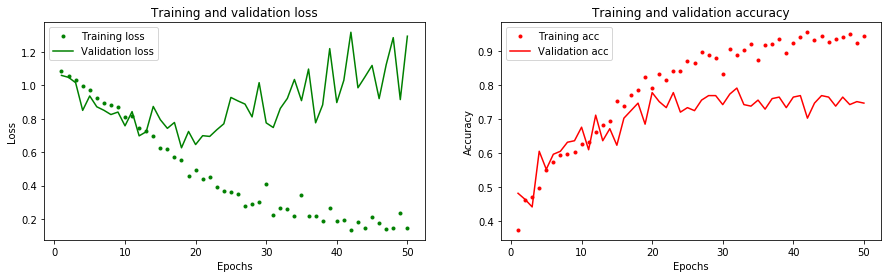

In [158]:
hist = results.history
loss_values = hist['loss']
val_loss_values = hist['val_loss']
acc_values = hist['acc'] 
val_acc_values = hist['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [159]:
classifier.save('model4.h5')

In [165]:
from keras.models import load_model
model4 = load_model('Models/model4.h5')
model4.load_weights('Models/model4_weights.best.hdf5')


In [169]:
model4.evaluate_generator(generator=test_set,
steps=231)

[0.8664002138406595, 0.7620720037040845]